# Loan Data Exploration

The motivation of this project is to find reasons why a user has a good credit score, and how this affects the profit or loss of loans.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

In [2]:
 df = pd.read_csv("prosperLoanData.csv")

In [3]:
# Dataframe without outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

#### As we are only going to use some fields of the dataset, we will use a heatmap to take the ones that have the highest relationship and we will also add the ones that seem interesting to us in the dictionary

Text(284.09375, 0.5, 'Values on Y axis')

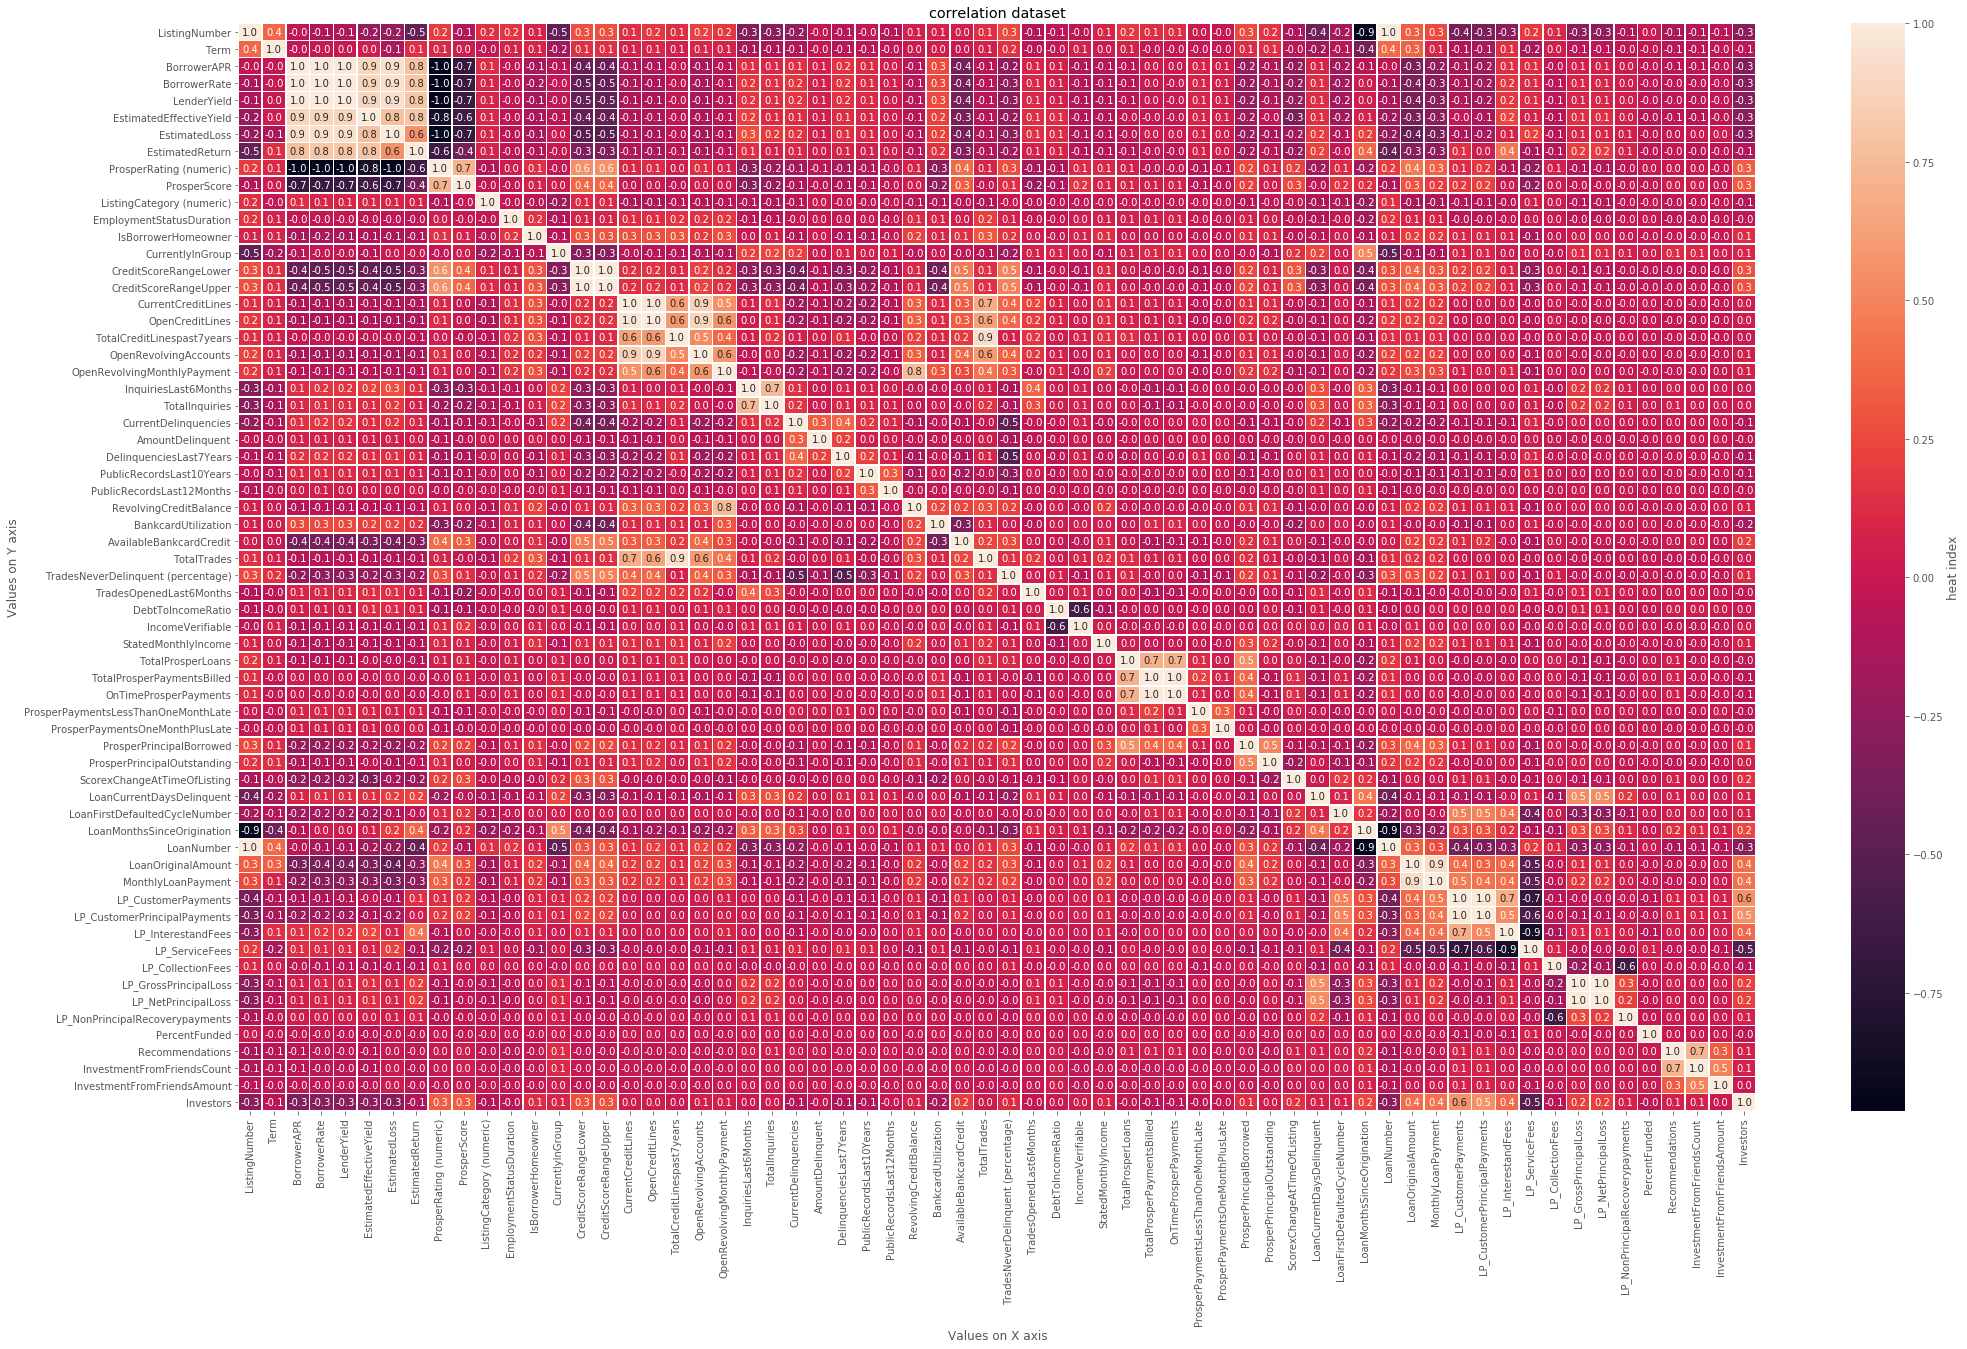

In [17]:
# heatmap to approximate which relationships are more convenient to review. 
f,ax = plt.subplots(figsize = (34,20))
sns.heatmap(df.corr(),\
            annot = True,\
            linewidths=.5,\
            fmt = '.1f',\
            ax = ax,\
            cbar_kws={'label': 'heat index'})\
            .set_title('correlation dataset')
plt.xlabel("Values on X axis")
plt.ylabel('Values on Y axis')

In [4]:
# Make a  copy of dataset
df_final = df.copy()


In [5]:
# We will only use years after 2009
df_final['ListingCreationDate'] = pd.to_datetime(df_final['ListingCreationDate'])
df_final['year'] = df_final['ListingCreationDate'].dt.year
df_final = df_final[df_final['year'] > 2009]
df_final['year'].value_counts()

2013    30445
2012    18026
2011    10294
2014     8752
2010     4675
Name: year, dtype: int64

In [20]:
df_final.head()

ListingKey  ListingNumber     ListingCreationDate CreditGrade  \
1  10273602499503308B223C1        1209647 2014-02-27 08:28:07.900         NaN   
3  0EF5356002482715299901A         658116 2012-10-22 11:02:35.010         NaN   
5  0F05359734824199381F61D        1074836 2013-12-14 08:26:37.093         NaN   
7  0F1035772717087366F9EA7         768193 2013-05-05 06:49:27.493         NaN   
8  0F043596202561788EA13D5        1023355 2013-12-02 10:43:39.117         NaN   

   Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  ...  \
1    36    Current        NaN      0.12016        0.0920       0.0820  ...   
3    36    Current        NaN      0.12528        0.0974       0.0874  ...   
5    60    Current        NaN      0.15425        0.1314       0.1214  ...   
7    36    Current        NaN      0.23939        0.2019       0.1919  ...   
8    36    Current        NaN      0.07620        0.0629       0.0529  ...   

   LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
1                0.0                    0.0                  0.0   
3                0.0                    0.0                  0.0   
5                0.0                    0.0                  0.0   
7                0.0                    0.0                  0.0   
8                0.0                    0.0                  0.0   

   LP_NonPrincipalRecoverypayments PercentFunded  Recommendations  \
1                              0.0           1.0                0   
3                              0.0           1.0                0   
5                              0.0           1.0                0   
7                              0.0           1.0                0   
8                              0.0           1.0                0   

   InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  year  
1                           0                         0.0         1  2014  
3                           0                         0.0       158  2012  
5                           0                         0.0         1  2013  
7                           0                         0.0         1  2013  
8                           0                         0.0         1  2013  

[5 rows x 82 columns]

In [6]:
# We bring the columns that we are going to review
df_final = df_final[['ListingNumber',\
                     'ListingCreationDate',\
                     'ListingCategory (numeric)',\
                    'Term',\
                    'BorrowerAPR',\
                    'BorrowerRate',\
                    'LenderYield',\
                    'EstimatedEffectiveYield',\
                    'EstimatedLoss',\
                    'EstimatedReturn',\
                    'ProsperRating (numeric)',\
                    'ProsperScore',\
                    'CurrentCreditLines',\
                    'OpenCreditLines',\
                    'TotalCreditLinespast7years',\
                    'OpenRevolvingAccounts',\
                    'OpenRevolvingMonthlyPayment',\
                    'TotalTrades',\
                    'Investors',\
                    'year']]
df_final.head(10)

ListingNumber     ListingCreationDate  ListingCategory (numeric)  Term  \
1         1209647 2014-02-27 08:28:07.900                          2    36   
3          658116 2012-10-22 11:02:35.010                         16    36   
5         1074836 2013-12-14 08:26:37.093                          1    60   
7          768193 2013-05-05 06:49:27.493                          2    36   
8         1023355 2013-12-02 10:43:39.117                          7    36   
9         1023355 2013-12-02 10:43:39.117                          7    36   
10         587746 2012-05-10 07:04:01.577                          1    60   
12        1081604 2013-12-15 20:01:10.757                          1    36   
14         757359 2013-04-19 11:17:41.700                          1    60   
15         577164 2012-04-10 09:14:46.297                         13    36   

    BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
1       0.12016        0.0920       0.0820                  0.07960   
3       0.12528        0.0974       0.0874                  0.08490   
5       0.15425        0.1314       0.1214                  0.11567   
7       0.23939        0.2019       0.1919                  0.17830   
8       0.07620        0.0629       0.0529                  0.05221   
9       0.07620        0.0629       0.0529                  0.05221   
10      0.27462        0.2489       0.2389                  0.23320   
12      0.17969        0.1435       0.1335                  0.12640   
14      0.11695        0.0949       0.0849                  0.08270   
15      0.35797        0.3177       0.3077                  0.28960   

    EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  \
1          0.0249          0.05470                      6.0           7.0   
3          0.0249          0.06000                      6.0           9.0   
5          0.0449          0.07077                      5.0          10.0   
7          0.0799          0.09840                      4.0           4.0   
8          0.0099          0.04231                      7.0           9.0   
9          0.0099          0.04231                      7.0          11.0   
10         0.0890          0.14420                      4.0           7.0   
12         0.0524          0.07400                      5.0           4.0   
14         0.0224          0.06030                      6.0           8.0   
15         0.1650          0.12460                      1.0           5.0   

    CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
1                 14.0             14.0                        29.0   
3                  5.0              5.0                        29.0   
5                 21.0             17.0                        49.0   
7                  6.0              6.0                        10.0   
8                 17.0             16.0                        32.0   
9                 17.0             16.0                        32.0   
10                 2.0              2.0                        56.0   
12                 9.0              7.0                        29.0   
14                25.0             22.0                        48.0   
15                10.0              9.0                        18.0   

    OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  TotalTrades  \
1                      13                        389.0         29.0   
3                       7                        115.0         26.0   
5                      13                       1410.0         47.0   
7                       5                        101.0         10.0   
8                      12                        219.0         29.0   
9                      12                        219.0         29.0   
10                      4                         25.0         47.0   
12                      8                        290.0         20.0   
14                     20                        823.0         48.0   
15                     

#### We review some characteristics of the dataset

In [7]:
# 
print("shape: {}\n".format(df_final.shape))
df_final.info()

shape: (72192, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72192 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ListingNumber                72192 non-null  int64         
 1   ListingCreationDate          72192 non-null  datetime64[ns]
 2   ListingCategory (numeric)    72192 non-null  int64         
 3   Term                         72192 non-null  int64         
 4   BorrowerAPR                  72192 non-null  float64       
 5   BorrowerRate                 72192 non-null  float64       
 6   LenderYield                  72192 non-null  float64       
 7   EstimatedEffectiveYield      72192 non-null  float64       
 8   EstimatedLoss                72192 non-null  float64       
 9   EstimatedReturn              72192 non-null  float64       
 10  ProsperRating (numeric)      72192 non-null  float64       
 11  ProsperScore        

In [8]:
df_final.describe()

ListingNumber  ListingCategory (numeric)          Term   BorrowerAPR  \
count   7.219200e+04               72192.000000  72192.000000  72192.000000   
mean    7.749283e+05                   3.599291     43.623670      0.229464   
std     2.299283e+05                   4.626467     12.271479      0.079313   
min     4.405430e+05                   0.000000     12.000000      0.049350   
25%     5.662400e+05                   1.000000     36.000000      0.169690   
50%     7.357605e+05                   1.000000     36.000000      0.222620   
75%     9.729938e+05                   6.000000     60.000000      0.293940   
max     1.255725e+06                  20.000000     60.000000      0.423950   

       BorrowerRate   LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
count  72192.000000  72192.000000             72192.000000   72192.000000   
mean       0.198834      0.188830                 0.172994       0.081752   
std        0.073991      0.073991                 0.068053       0.046383   
min        0.040000      0.030000                -0.177300       0.004900   
25%        0.140000      0.130000                 0.122500       0.044900   
50%        0.190500      0.180500                 0.164900       0.074900   
75%        0.259900      0.249900                 0.230570       0.112000   
max        0.360000      0.340000                 0.319900       0.366000   

       EstimatedReturn  ProsperRating (numeric)  ProsperScore  \
count     72192.000000             72192.000000  72192.000000   
mean          0.097199                 4.019822      5.901180   
std           0.029917                 1.661331      2.382124   
min          -0.177300                 1.000000      1.000000   
25%           0.075170                 3.000000      4.000000   
50%           0.094100                 4.000000      6.000000   
75%           0.118500                 5.000000      8.000000   
max           0.266700                 7.000000     11.000000   

       CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
count        72192.000000     72192.000000                72192.000000   
mean            10.574953         9.605053                   28.312334   
std              5.475676         5.084257                   13.420174   
min              0.000000         0.000000                    2.000000   
25%              7.000000         6.000000                   19.000000   
50%             10.000000         9.000000                   27.000000   
75%             13.000000        12.000000                   36.000000   
max             59.000000        54.000000                  125.000000   

       OpenRevolvingAccounts  OpenRevolvingMonthlyPayment   TotalTrades  \
count           72192.000000                 72192.000000  72192.000000   
mean                7.475676                   441.042290     24.504225   
std                 4.663433                   445.752131     11.768522   
min                 0.000000                     0.000000      1.000000   
25%                 4.000000                   153.000000     16.000000   
50%                 7.000000                   310.000000     23.000000   
75%                10.000000                   576.000000     31.000000   
max                50.000000                 13765.000000    118.000000   

          Investors          year  
count  72192.000000  72192.000000  
mean      68.644794   2012.392079  
std       95.319251      1.074507  
min        1.000000   2010.000000  
25%        1.000000   2012.000000  
50%       31.000000   2013.000000  
75%       97.000000   2013.000000  
max      866.000000   2014.000000

## What is the structure of your dataset?

    Here we find 113,937 loans and we will use 18 columns, most of the data is numeric.

#### Data dictionary

| Column                      | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingNumber               | The number that uniquely identifies the listing to the public as displayed on the website.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| ListingCategory (numeric)   | The category of the listing that the borrower selected when posting their listing:<br>        0 - Not Available<br>        1 - Debt Consolidation<br>        2 - Home Improvement<br>        3 - Business<br>        4 - Personal Loan<br>        5 - Student Use<br>        6 - Auto<br>        7- Other<br>        8 - Baby&Adoption<br>        9 - Boat<br>        10 - Cosmetic Procedure<br>        11 - Engagement Ring<br>        12 - Green Loans<br>        13 - Household Expenses<br>        14 - Large Purchases<br>        15 - Medical/Dental<br>        16 - Motorcycle<br>        17 - RV<br>        18 - Taxes<br>        19 - Vacation<br>        20 - Wedding Loans |
| Term                        | The length of the loan expressed in months.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BorrowerAPR                 | The Borrower's Annual Percentage Rate (APR) for the loan.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| BorrowerRate                | The Borrower's interest rate for this loan.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| LenderYield                 | The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EstimatedEffectiveYield     | Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, <br>(iii) plus estimated collected late fees. Applicable for loans originated after July 2009.                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EstimatedLoss               | Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| EstimatedReturn             | The estimated return assigned to the listing at the time it was created. <br>Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. <br>Applicable for loans originated after July 2009                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ProsperRating (numeric)     | The  Prosper Rating assigned at the time the listing was created:<br>        0 - N/A<br>        1 - HR<br>        2 - E<br>        3 - D<br>        4 - C<br>        5 - B<br>        6 - A<br>        7 - AA<br>Applicable for loans originated after July 2009.                                                                                                                                                                                                                                                                                                                                                                                                                      |
| ProsperScore                | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  <br>Applicable for loans originated after July 2009.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| CurrentCreditLines          | Number of current credit lines at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| OpenCreditLines             | Number of open credit lines at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| TotalCreditLinespast7years  | Number of credit lines in the past seven years at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| OpenRevolvingAccounts       | Number of open revolving accounts at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| OpenRevolvingMonthlyPayment | Monthly payment on revolving accounts at the time the credit profile was pulled                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| TotalTrades                 | Number of trade lines ever opened at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Investors                   | The number of investors that funded the loan.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
    


### What is/are the main feature(s) of interest in your dataset?

Let's review what the most interesting variables are, let's explore.


## Univariate Exploration

I'll start by looking at the distribution of the main's variable of interest: 

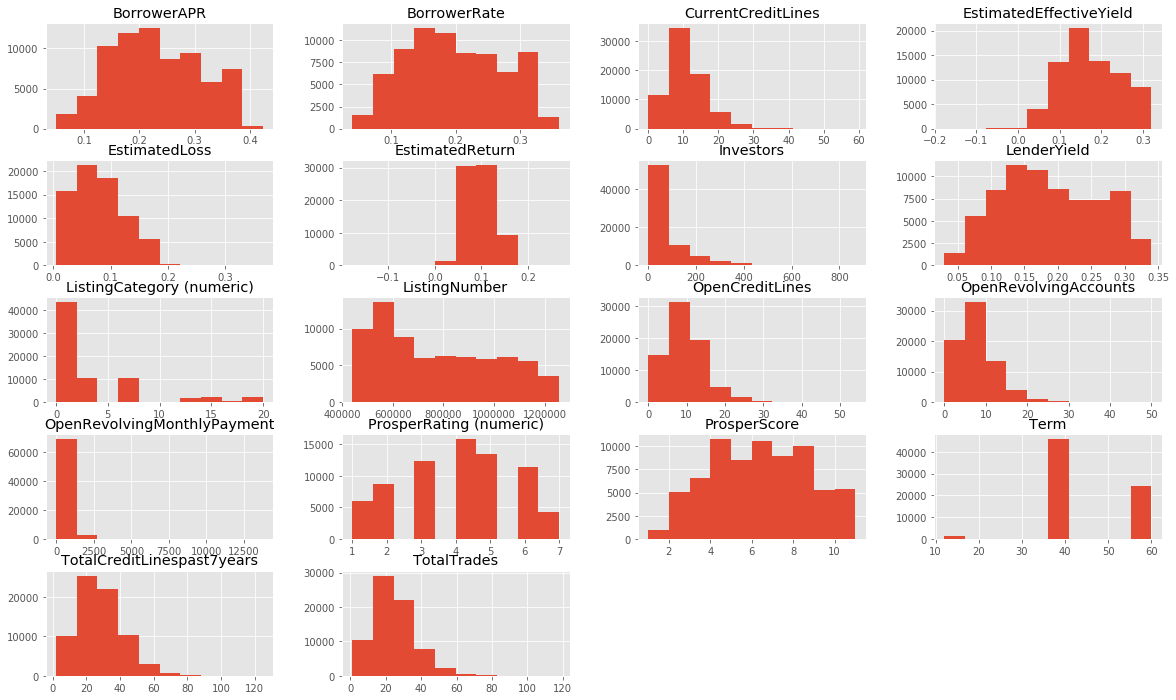

In [24]:
# let's do a general review of the variables
df_final.hist(figsize=(20,12));

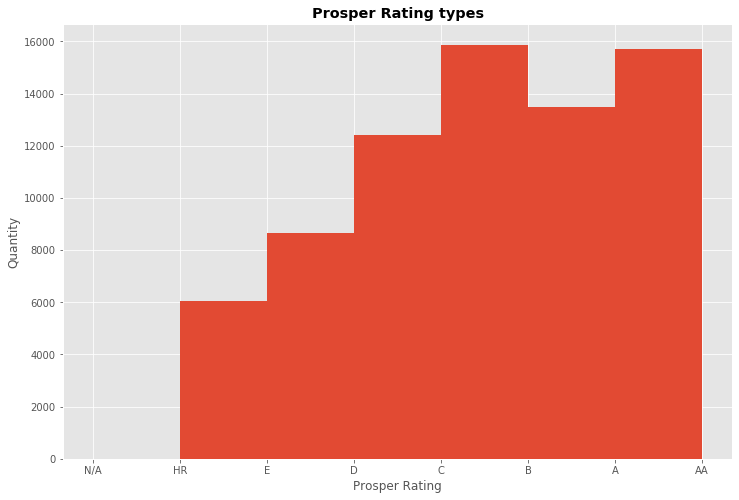

In [25]:
# Prosper Rating hist
bin_edges = np.arange(0, df_final['ProsperRating (numeric)'].max()+1, 1)

plt.figure(figsize=[12, 8])
plt.hist(data = df_final, x = 'ProsperRating (numeric)', bins = bin_edges)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'])
plt.xlabel('Prosper Rating')
plt.ylabel('Quantity')
plt.title('Prosper Rating types', fontweight="bold")
plt.show()

We could say that the Prosper Rating of the applicants in most cases is on the rise, located in the most risky, where we observe a small decrease with respect to the pattern is type **A**

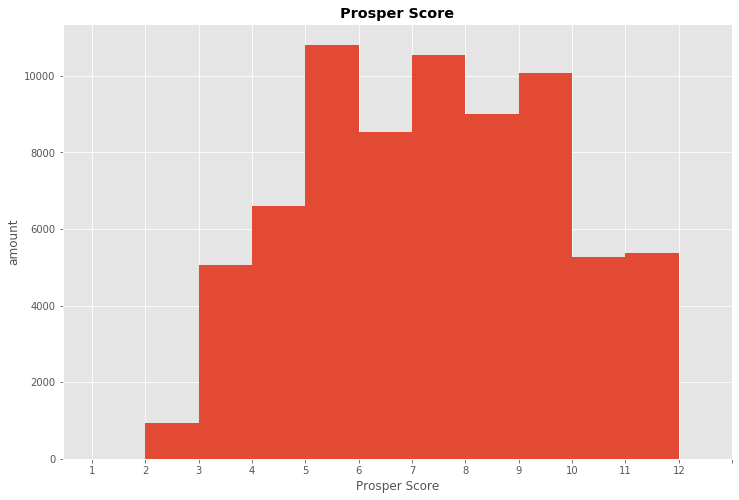

In [26]:
# Prosper Score hist
bin_edges = np.arange(0, df_final['ProsperScore'].max()+1, 1)

plt.figure(figsize=[12, 8])
plt.hist(data = df_final, x = 'ProsperScore', bins = bin_edges)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xlabel('Prosper Score')
plt.ylabel('amount')
plt.title('Prosper Score', fontweight="bold")
plt.show()

We can the scores of the users are mostly between 5 and 9


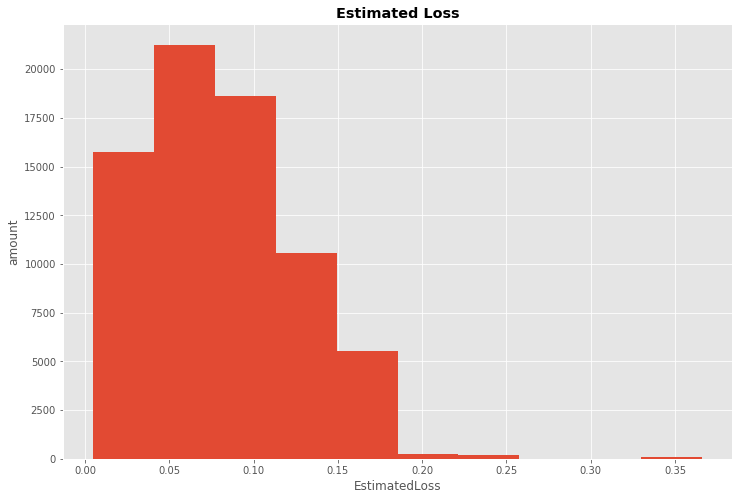

In [27]:
# Estimated Loss hist
bin_edges = np.arange(0, df_final['EstimatedLoss'].max()+1, 1)

plt.figure(figsize=[12, 8])
plt.hist(data = df_final, x = 'EstimatedLoss')#, bins = bin_edges)
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xlabel('EstimatedLoss')
plt.ylabel('amount')
plt.title('Estimated Loss', fontweight="bold")
plt.show()

We observe in this graph that the estimated losses are mostly quite low.

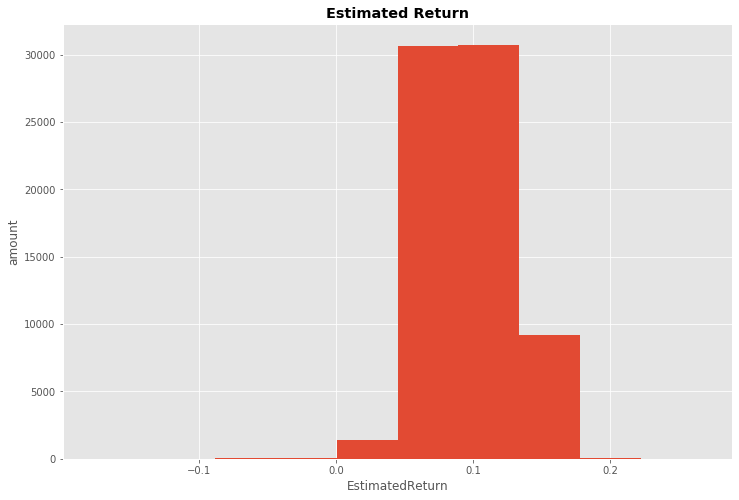

In [31]:
# Estimated Return hist
bin_edges = np.arange(0, df_final['EstimatedReturn'].max()+1, 1)

plt.figure(figsize=[12, 8])
plt.hist(data = df_final, x = 'EstimatedReturn')#, bins = bin_edges)
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
plt.xlabel('EstimatedReturn')
plt.ylabel('amount')
plt.title('Estimated Return', fontweight="bold")
plt.show()

classically always the estimated return rate is higher than the loss rate

Text(0.5, 0, 'Estimated Loss')

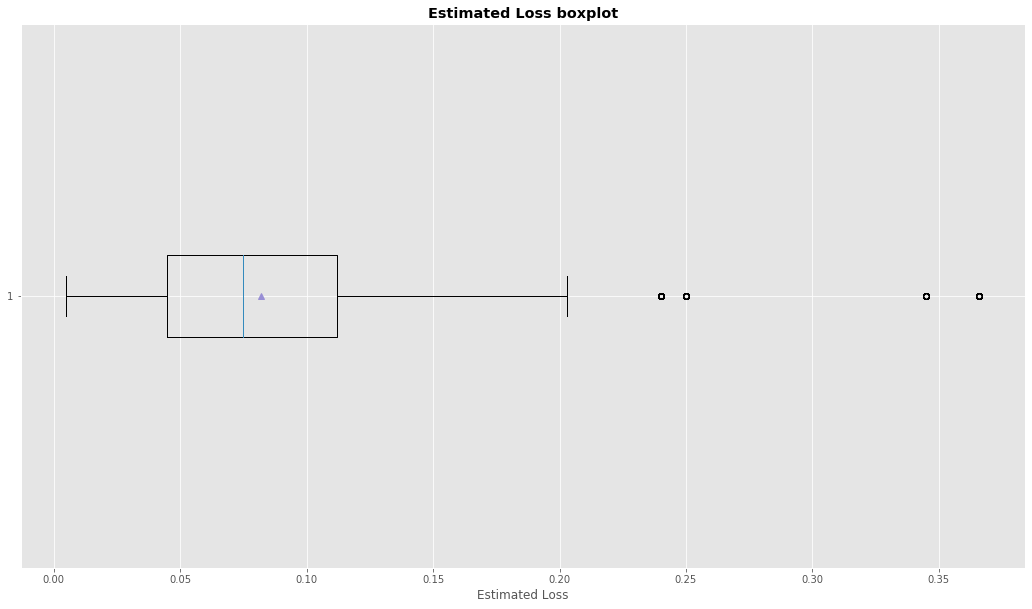

In [35]:
# Boxplot for estimated loss
plt.subplots(figsize=(18,10))
bp = plt.boxplot(df_final['EstimatedLoss'], vert=False, showmeans=True)
plt.title(('Estimated Loss boxplot'), fontweight="bold")
plt.xlabel('Estimated Loss')

There are still some outliers left, but let's see the median is a little lower than the mean, and the losses are found with a mean of 0.08

## Bivariate Exploration

For this analysis we have the majority of variables that are related to each other, so we are going to make some plots to observe the relationships

Text(285.0, 0.5, 'Values on Y axis')

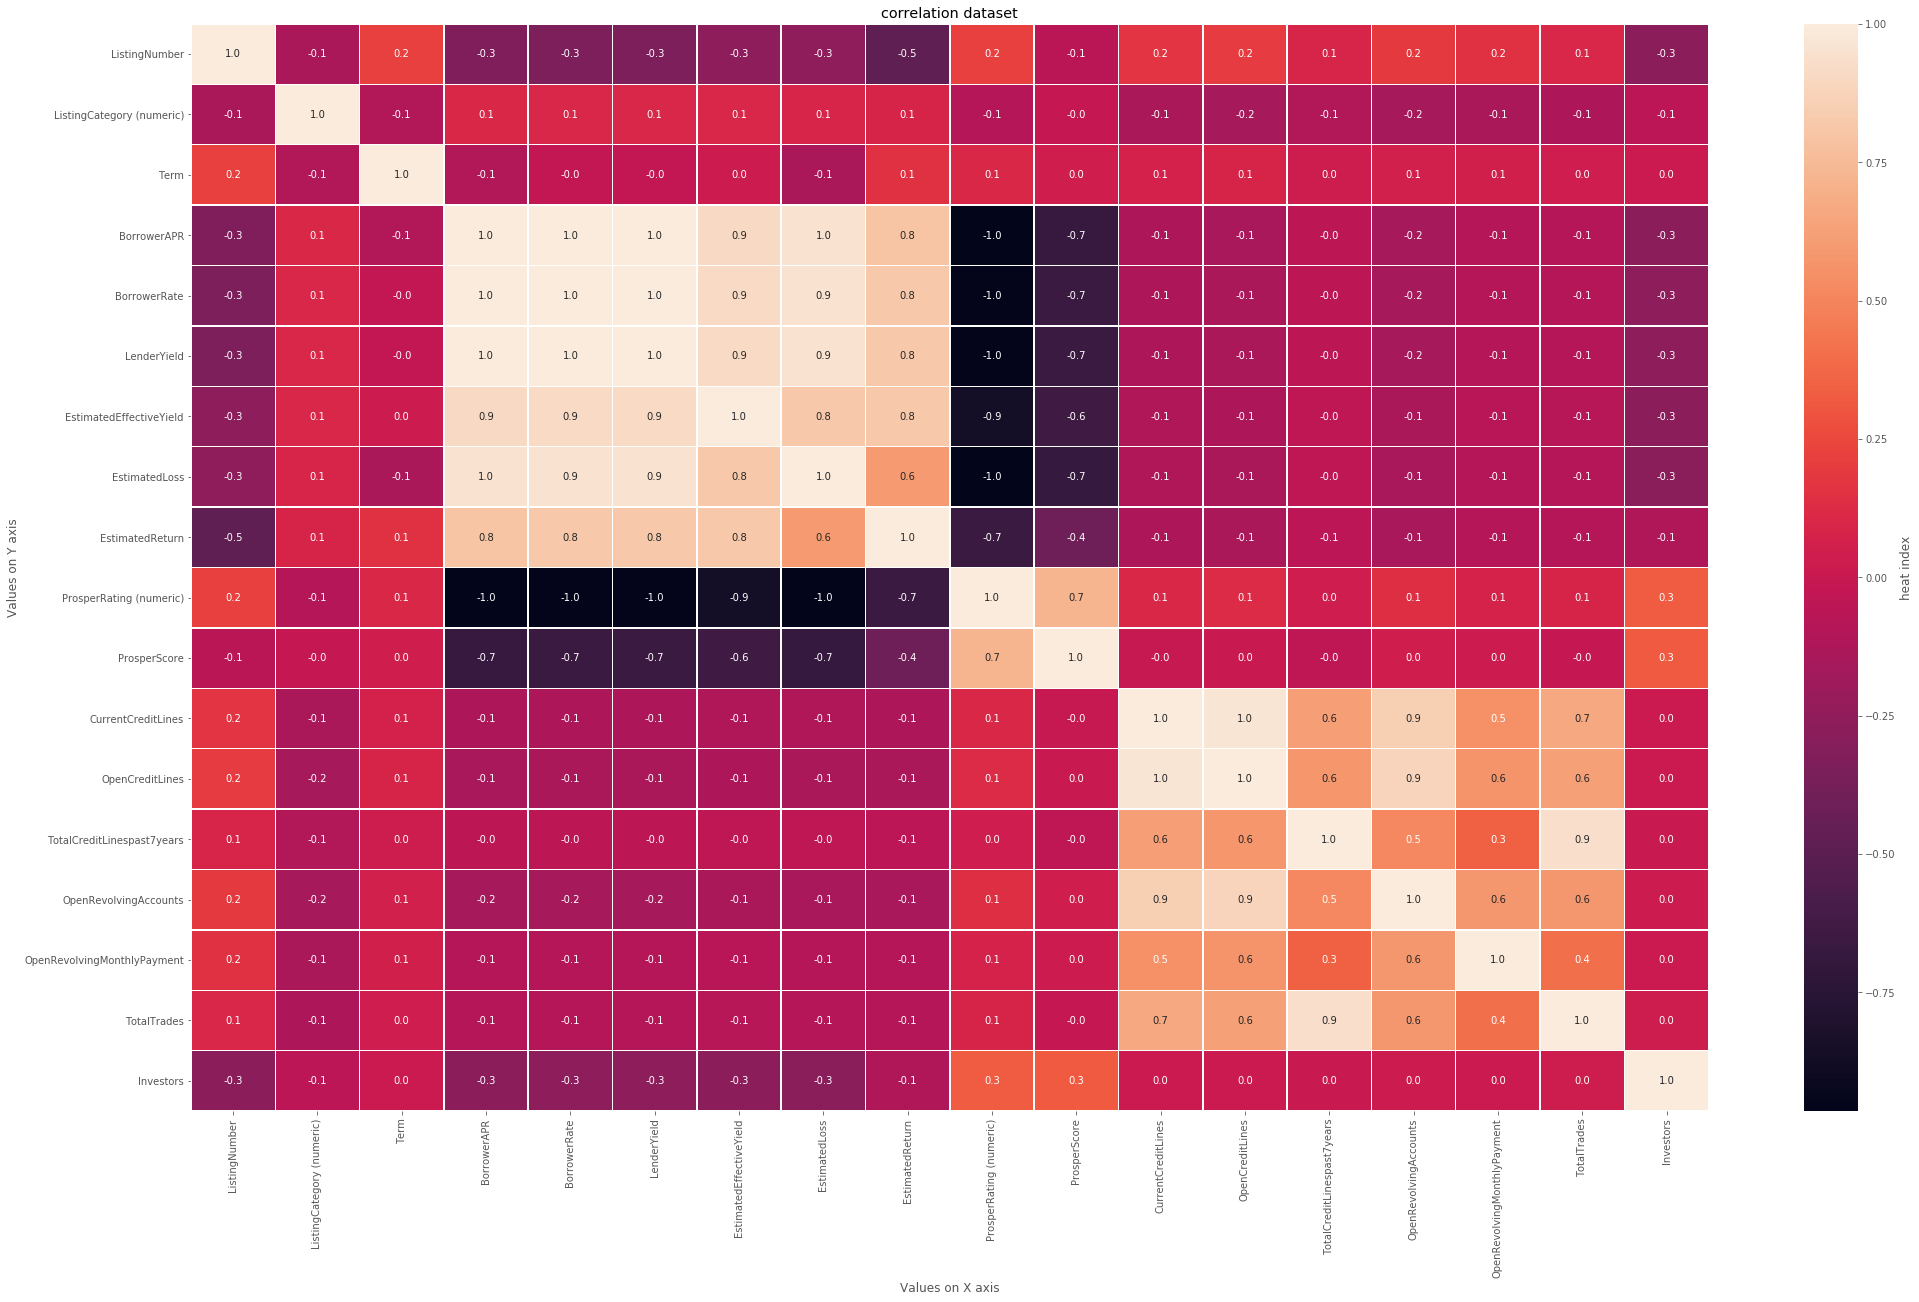

In [30]:
# heatmap 
f,ax = plt.subplots(figsize = (34,20))
sns.heatmap(df_final.corr(),\
            annot = True,\
            linewidths=.5,\
            fmt = '.1f',\
            ax = ax,\
            cbar_kws={'label': 'heat index'})\
            .set_title('correlation dataset')
plt.xlabel("Values on X axis")
plt.ylabel('Values on Y axis')

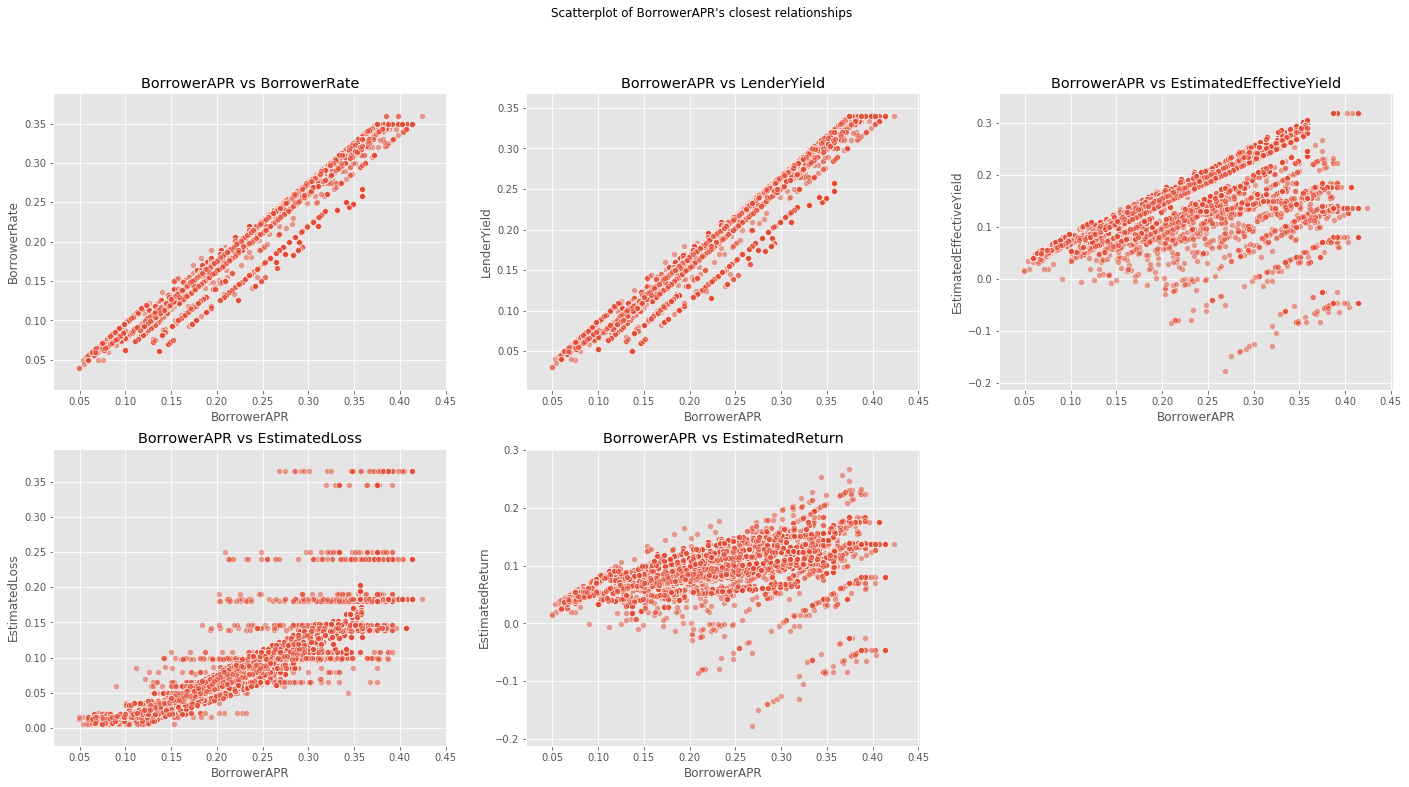

In [70]:
# Subplots for BorrowerAPR 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Scatterplot of BorrowerAPR's closest relationships")
columns = 3
rows = 2
column = ['BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn'] 
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.scatterplot(x = 'BorrowerAPR',\
                y = column[i-1],\
                alpha = 0.5,\
                data = df_final).set_title("BorrowerAPR vs {}".format(column[i-1]))
plt.show()



As we can see a strong positive relationship between BorrowerAPR and BorrowerRate / LenderYield, but with the other variables, even though a positive relationship is maintained, it becomes less strong.

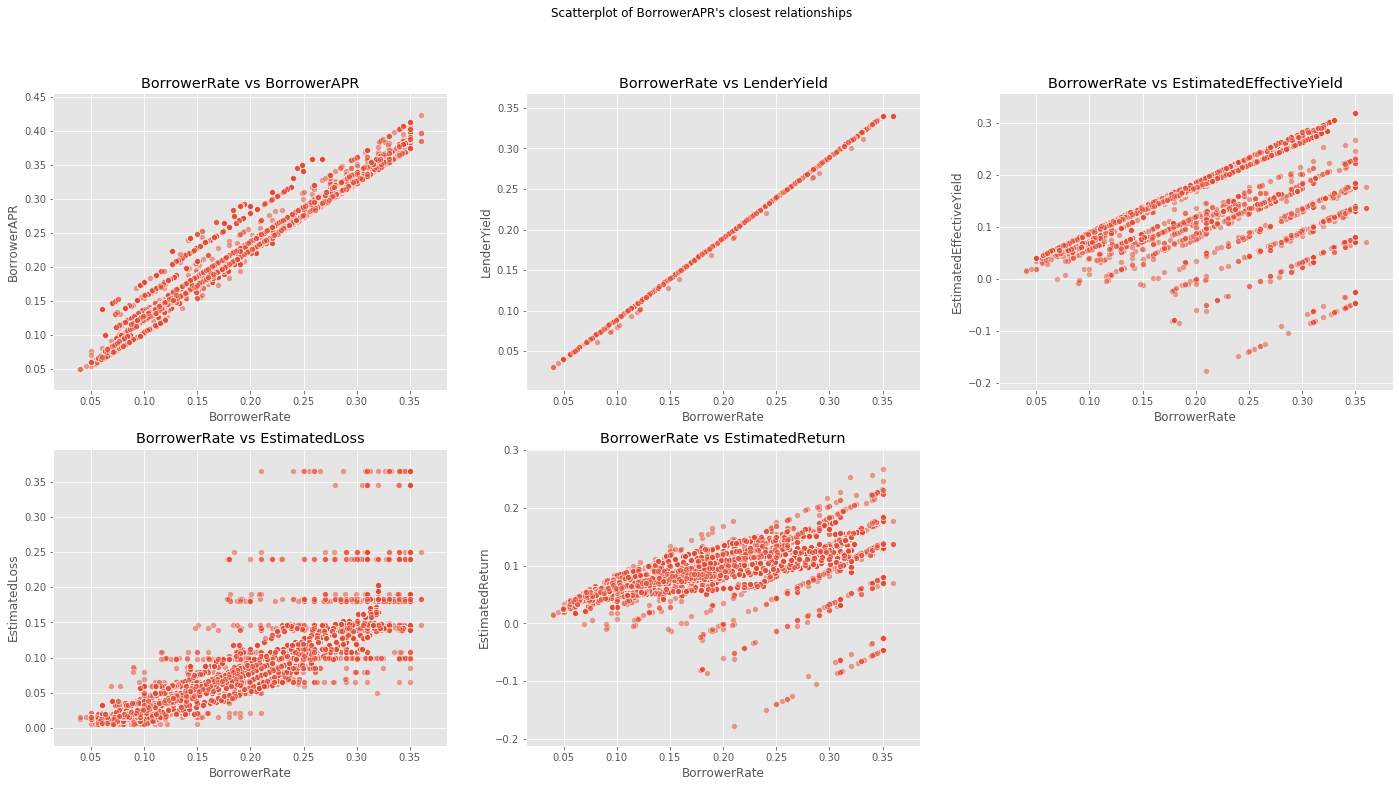

In [69]:
# Subplots for BorrowerRate 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Scatterplot of BorrowerAPR's closest relationships")
columns = 3
rows = 2
column = ['BorrowerAPR', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn'] 
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.scatterplot(x = 'BorrowerRate',\
                y = column[i-1],\
                alpha = 0.5,\
                data = df_final).set_title("BorrowerRate vs {}".format(column[i-1]))
plt.show()

With the variable BorrowerRate, the strongest relationship is LenderYield then BorrowerAPR, and hence the relationship is a bit more unstable, but always positive.

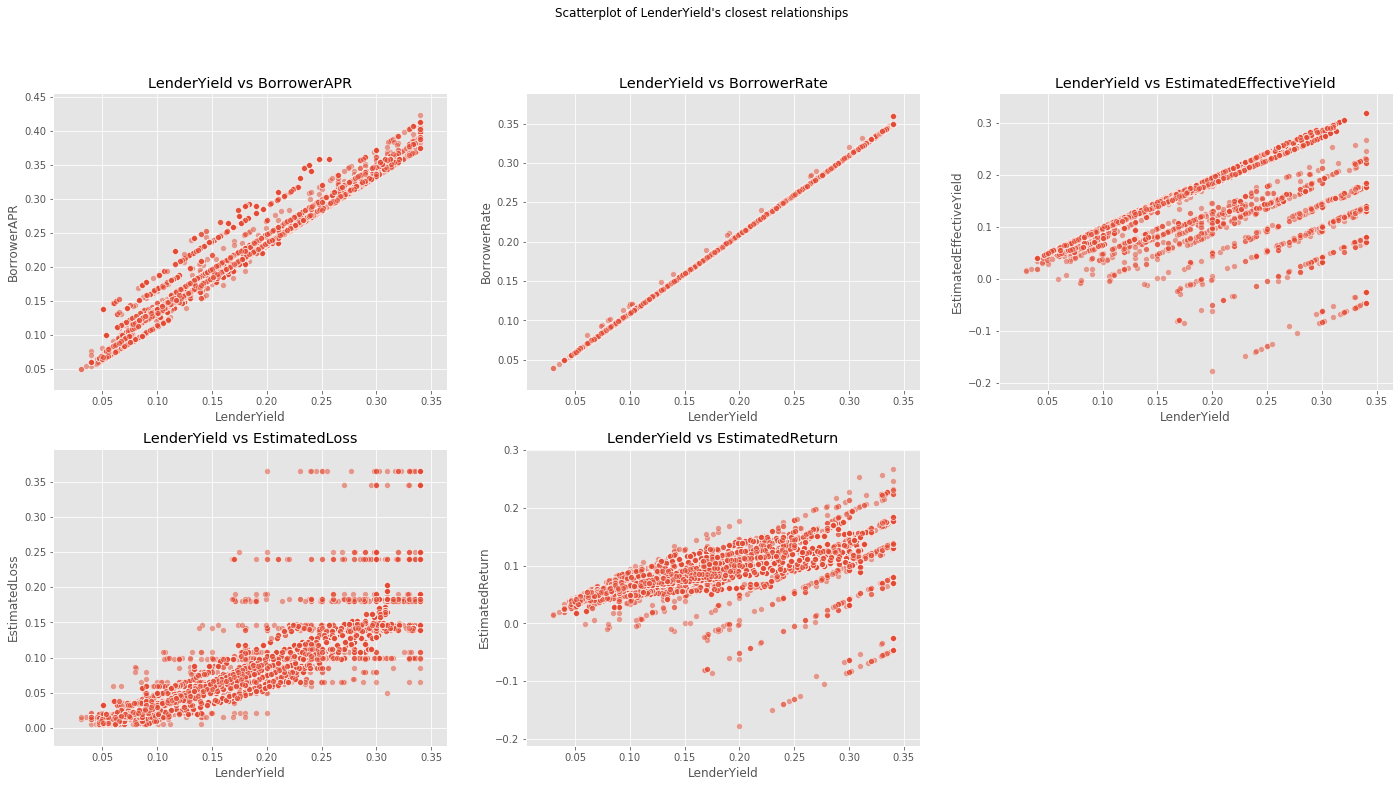

In [68]:
# Subplots for LenderYield 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Scatterplot of LenderYield's closest relationships")
columns = 3
rows = 2
column = ['BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn'] 
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.scatterplot(x = 'LenderYield',\
                y = column[i-1],\
                alpha = 0.5,\
                data = df_final).set_title("LenderYield vs {}".format(column[i-1]))
plt.show()

The LenderYield variable has the same behavior as BorrowerRate, and hence its perfect relationship.

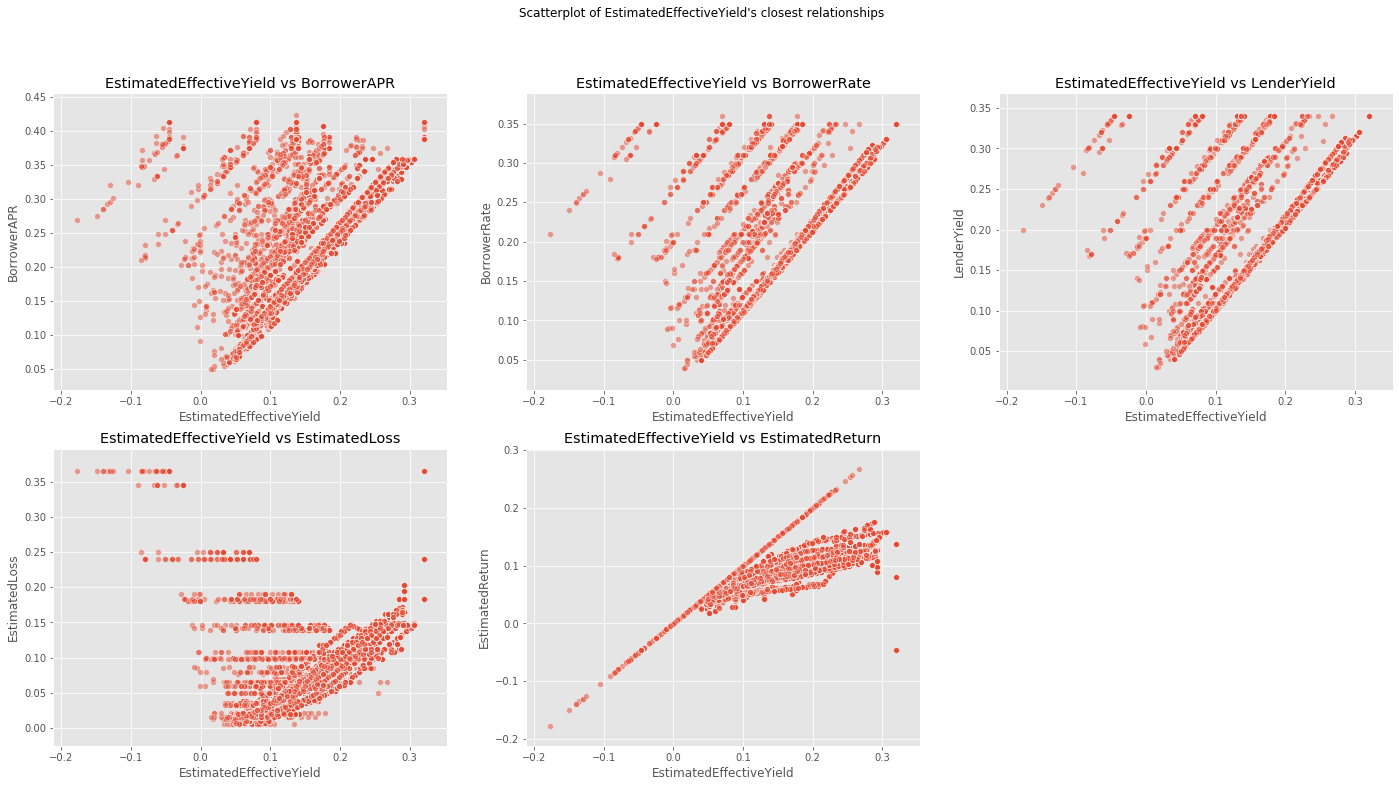

In [71]:
# Subplots for EstimatedEffectiveYield 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Scatterplot of EstimatedEffectiveYield's closest relationships")
columns = 3
rows = 2
column = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedLoss', 'EstimatedReturn'] 
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.scatterplot(x = 'EstimatedEffectiveYield',\
                y = column[i-1],\
                alpha = 0.5,\
                data = df_final).set_title("EstimatedEffectiveYield vs {}".format(column[i-1]))
plt.show()

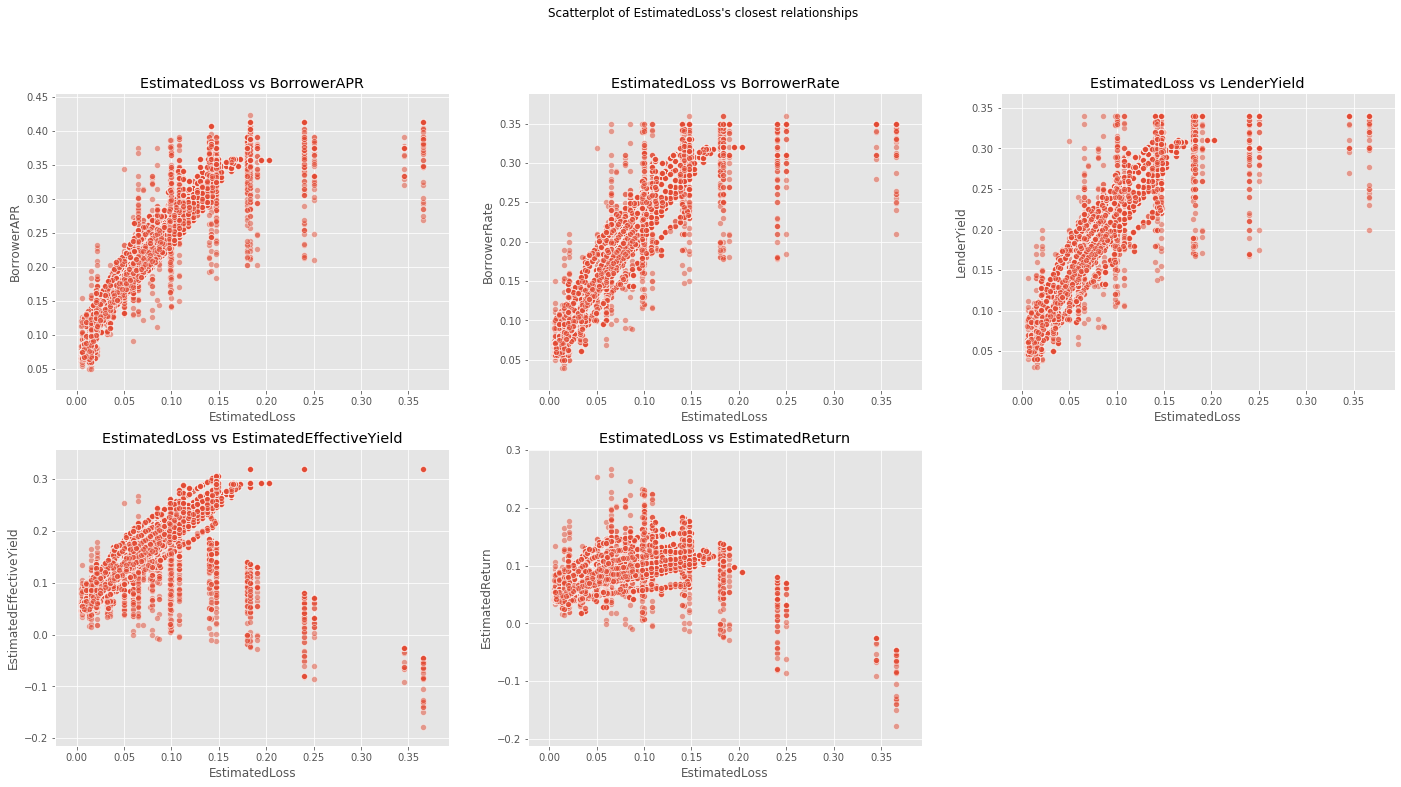

In [72]:
# Subplots for EstimatedLoss 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Scatterplot of EstimatedLoss's closest relationships")
columns = 3
rows = 2
column = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedReturn'] 
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.scatterplot(x = 'EstimatedLoss',\
                y = column[i-1],\
                alpha = 0.5,\
                data = df_final).set_title("EstimatedLoss vs {}".format(column[i-1]))
plt.show()

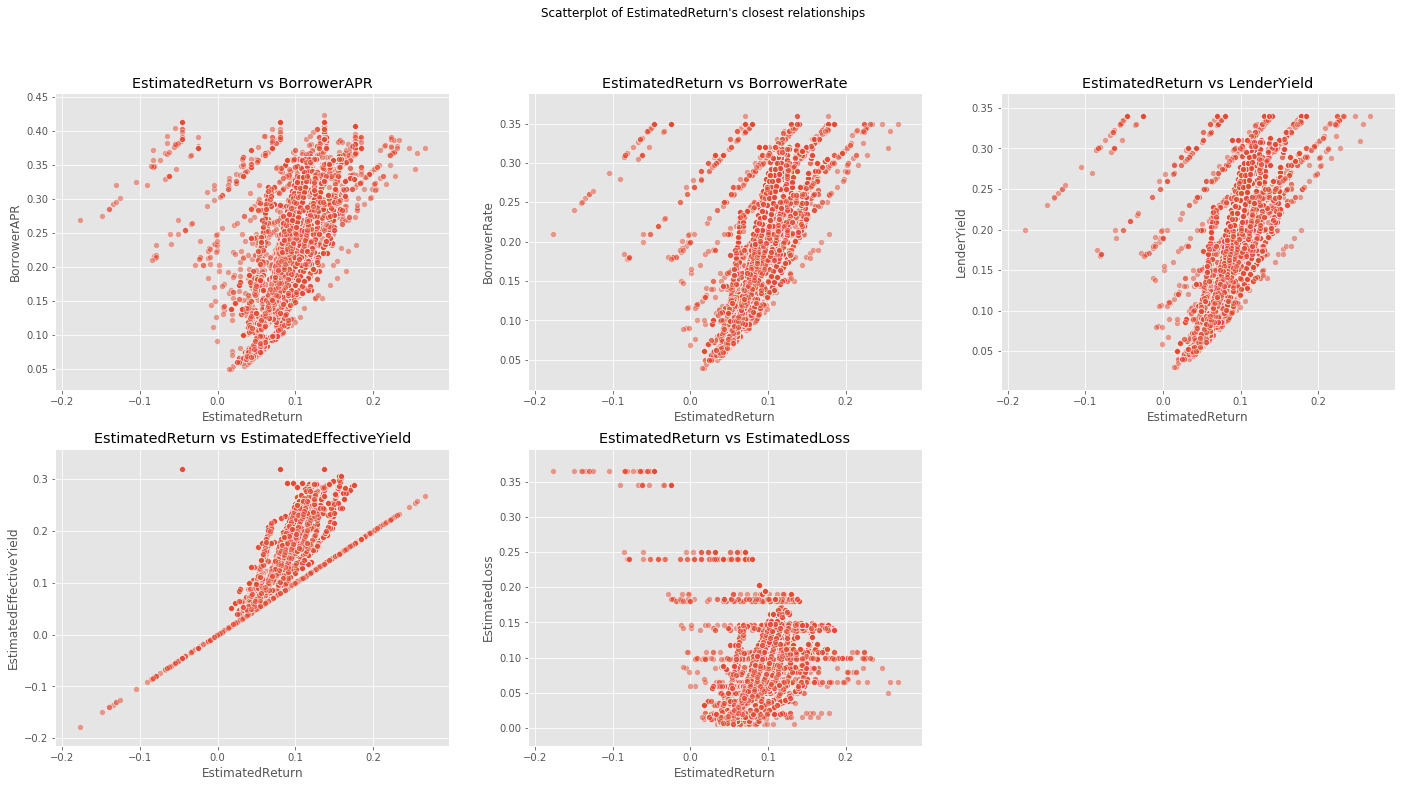

In [15]:
# Subplots for EstimatedReturn 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Scatterplot of EstimatedReturn's closest relationships")
columns = 3
rows = 2
column = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss'] 
for i in range(1, 6):
    fig.add_subplot(rows, columns, i)
    sns.scatterplot(x = 'EstimatedReturn',\
                y = column[i-1],\
                alpha = 0.5,\
                data = df_final).set_title("EstimatedReturn vs {}".format(column[i-1]))
plt.show()

**The following variables have positive relationships with the other variables but it is a bit uneven with respect to the first visualizations.**

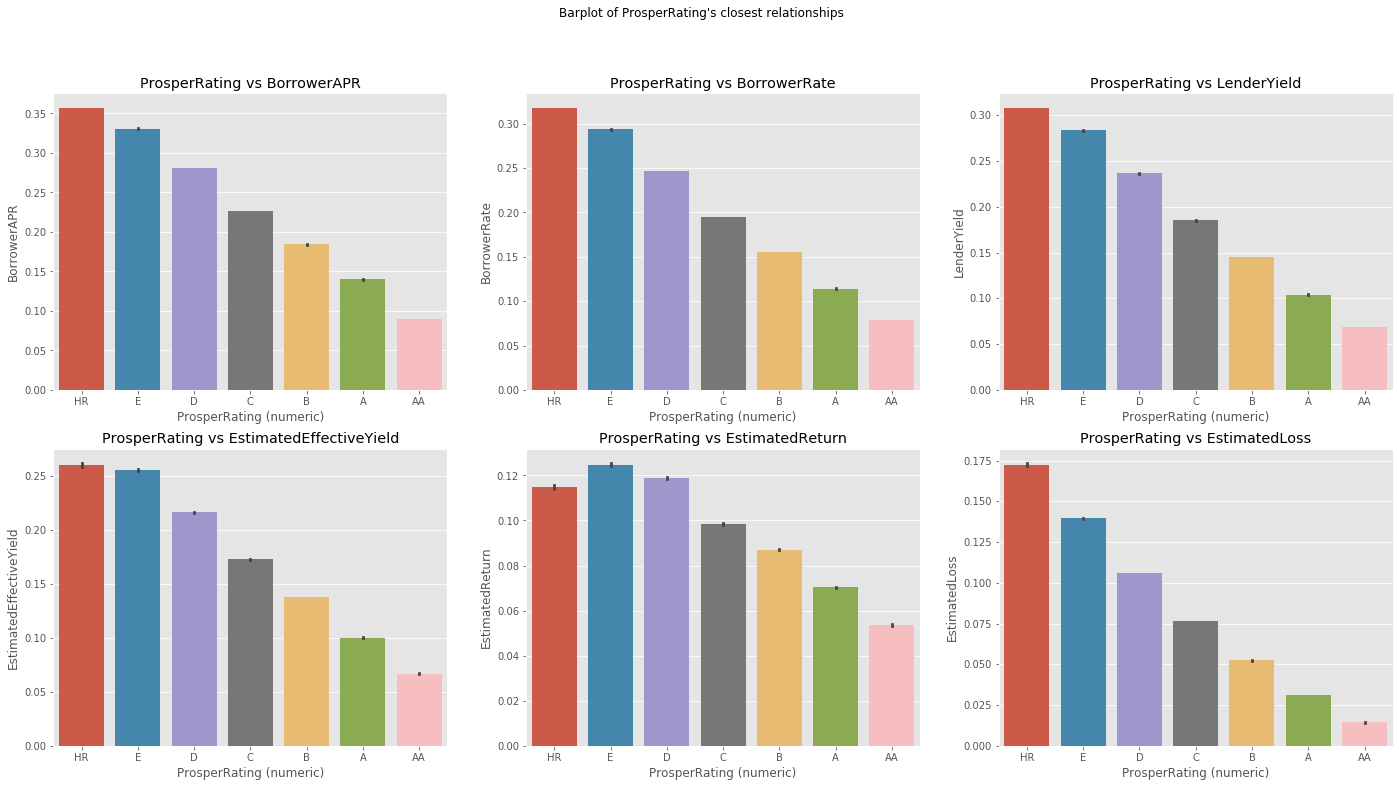

In [87]:
# Subplots for ProsperRating (numeric) 
fig=plt.figure(figsize=(24, 12))
fig.suptitle("Barplot of ProsperRating's closest relationships")
columns = 3
rows = 2
column = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield','EstimatedReturn', 'EstimatedLoss'] 
for i in range(1, 7):
    fig.add_subplot(rows, columns, i)
    sns.barplot(x = 'ProsperRating (numeric)',\
                y = column[i-1],\
                data = df_final).set_title("ProsperRating vs {}".format(column[i-1]))
    
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'])             
plt.show()

Here we see a negative relationship between ProsperRating vs BorrowerAPR / BorrowerRate / LenderYield / EstimatedEffectiveYield / EstimatedReturn / EstimatedLoss

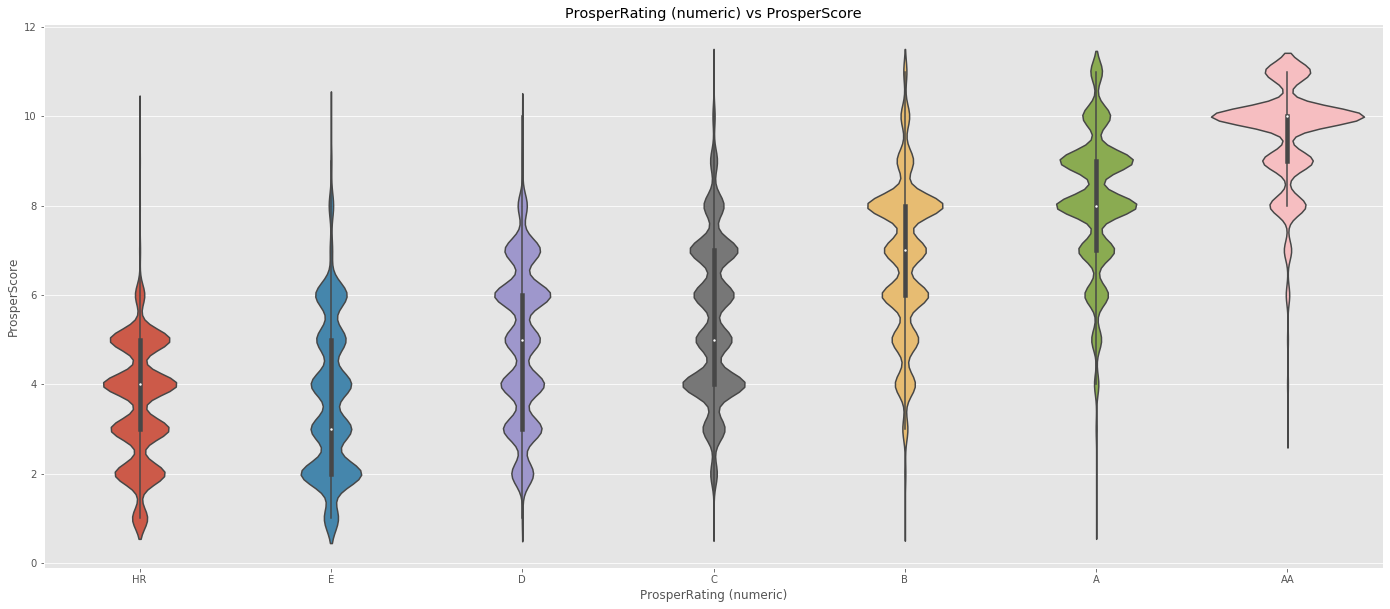

In [78]:
# violin plot
plt.figure(figsize = [24, 10])
ax = sns.violinplot(data = df_final, x = 'ProsperRating (numeric)', y = 'ProsperScore')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'])
ax.set_title("ProsperRating (numeric) vs ProsperScore")
plt.show()



In this plot we can see how the higher the ProsperRating, the higher the ProsperScore, a positive relationship but represented in another way.

### Some conclusions

As we can see in the graphs, there is a fairly close relationship between the borrower and estimated columns, this makes us know that the more one grows, the greater the other will be, which gives us greater clarity about the risks of these loans.

We also observe the interesting relationship between prosper rating and prosper score, where we observe that most of the users evaluated with high degrees are the safest to invest, and have a higher prosper score, which is good since it generates mutual security.

## Multivariate Exploration

Here we will try to use the "year" column for the following graphs, and we will try to make some interesting plots about the loan.

In [22]:
# first we must go to prosper rating to letters
new_prosper_rating = {'ProsperRating (numeric)': {0:'N/A', 1:'HR', 2:'E', 3:'D', 4:'C', 5:'B', 6:'A', 7:'AA'}}

df_final.replace(new_prosper_rating, inplace = True)
df_final.head()

ListingNumber     ListingCreationDate  ListingCategory (numeric)  Term  \
1        1209647 2014-02-27 08:28:07.900                          2    36   
3         658116 2012-10-22 11:02:35.010                         16    36   
5        1074836 2013-12-14 08:26:37.093                          1    60   
7         768193 2013-05-05 06:49:27.493                          2    36   
8        1023355 2013-12-02 10:43:39.117                          7    36   

   BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  \
1      0.12016        0.0920       0.0820                  0.07960   
3      0.12528        0.0974       0.0874                  0.08490   
5      0.15425        0.1314       0.1214                  0.11567   
7      0.23939        0.2019       0.1919                  0.17830   
8      0.07620        0.0629       0.0529                  0.05221   

   EstimatedLoss  EstimatedReturn ProsperRating (numeric)  ProsperScore  \
1         0.0249          0.05470                       A           7.0   
3         0.0249          0.06000                       A           9.0   
5         0.0449          0.07077                       B          10.0   
7         0.0799          0.09840                       C           4.0   
8         0.0099          0.04231                      AA           9.0   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
1                14.0             14.0                        29.0   
3                 5.0              5.0                        29.0   
5                21.0             17.0                        49.0   
7                 6.0              6.0                        10.0   
8                17.0             16.0                        32.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  TotalTrades  Investors  \
1                     13                        389.0         29.0          1   
3                      7                        115.0         26.0        158   
5                     13                       1410.0         47.0          1   
7                      5                        101.0         10.0          1   
8                     12                        219.0         29.0          1   

   year  
1  2014  
3  2012  
5  2013  
7  2013  
8  2013

**In these plots we mostly use the Prosper rating as the third variable with respect to relationships.**

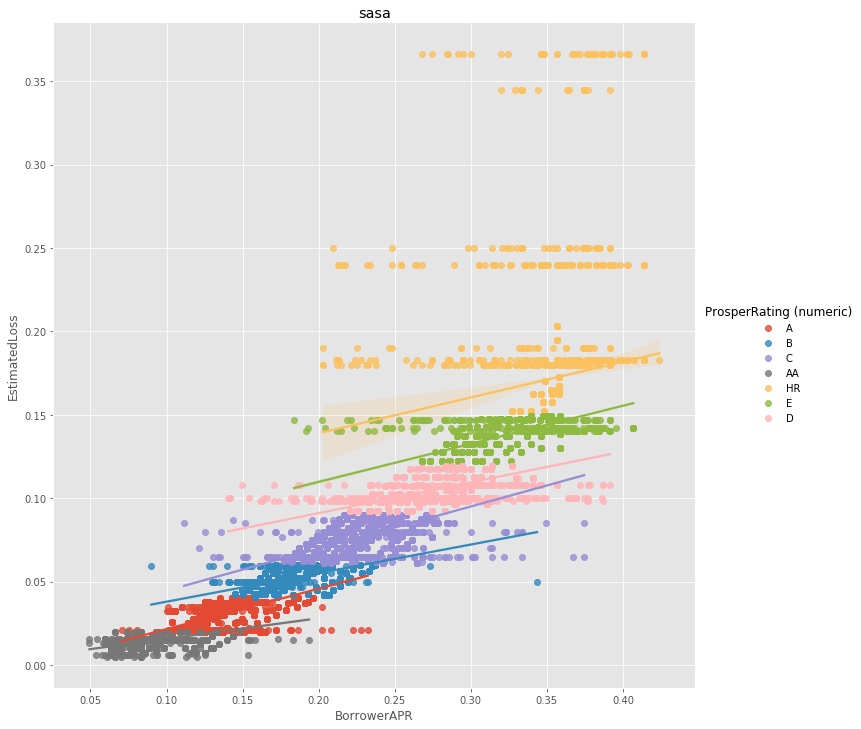

In [23]:
sns.lmplot(x='BorrowerAPR',height = 10, y='EstimatedLoss', hue='ProsperRating (numeric)', 
           fit_reg=True, data=df_final)
plt.show()

As we can see in the relationship between BorrowerAPR and EstimatedLoss, the prosper rating greatly influences, since the higher the rank, the lower the estimated loss, since they are the most reliable users for loans.

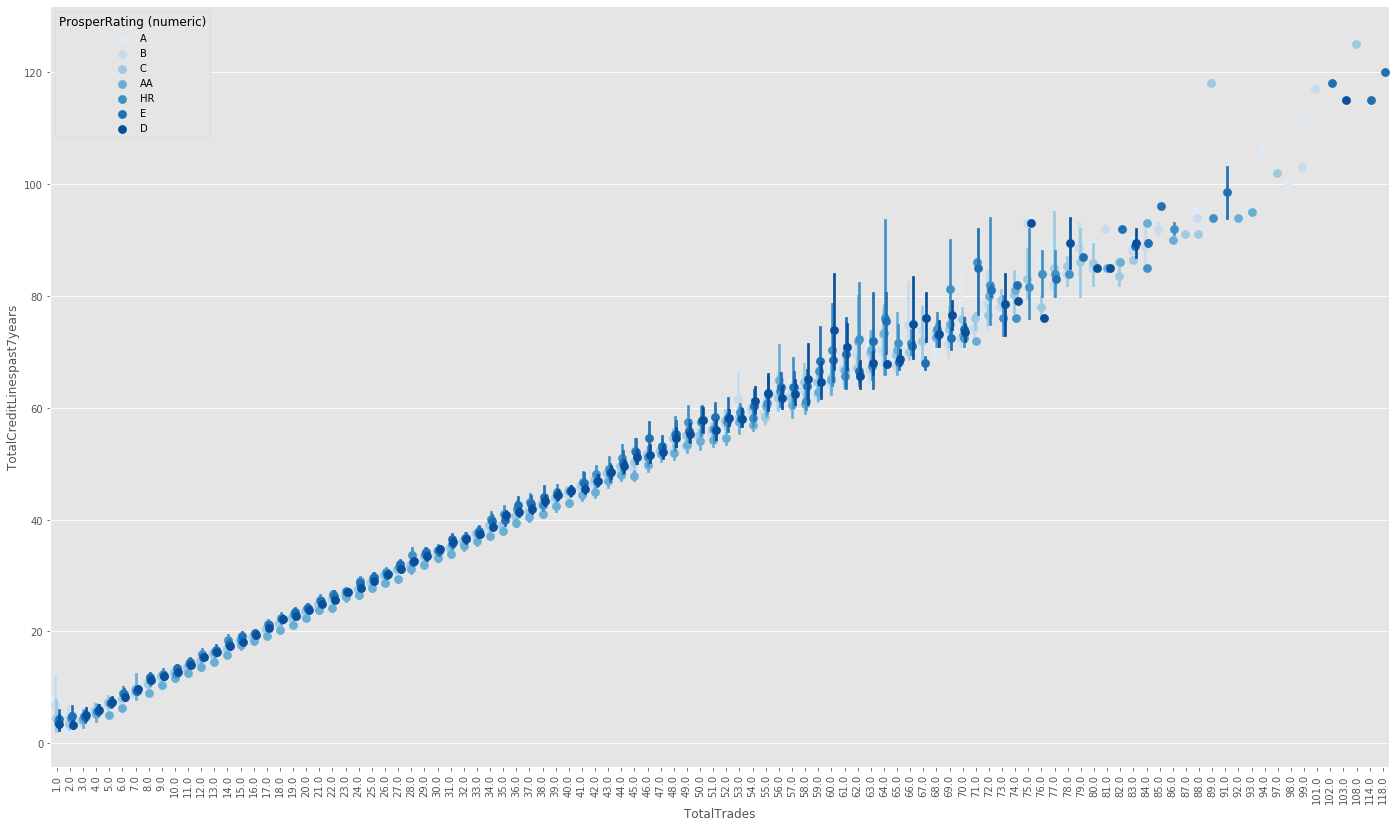

In [24]:
plt.figure(figsize = [24, 14])
sns.pointplot(data = df_final, x = 'TotalTrades', y = 'TotalCreditLinespast7years', hue = 'ProsperRating (numeric)',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.xticks(rotation='vertical');
plt.show()

Another interesting graph about the relationship between the total trade with that of the past 7 years, we can see that it is constant and as the highest prosper ratings mostly have fewer trades

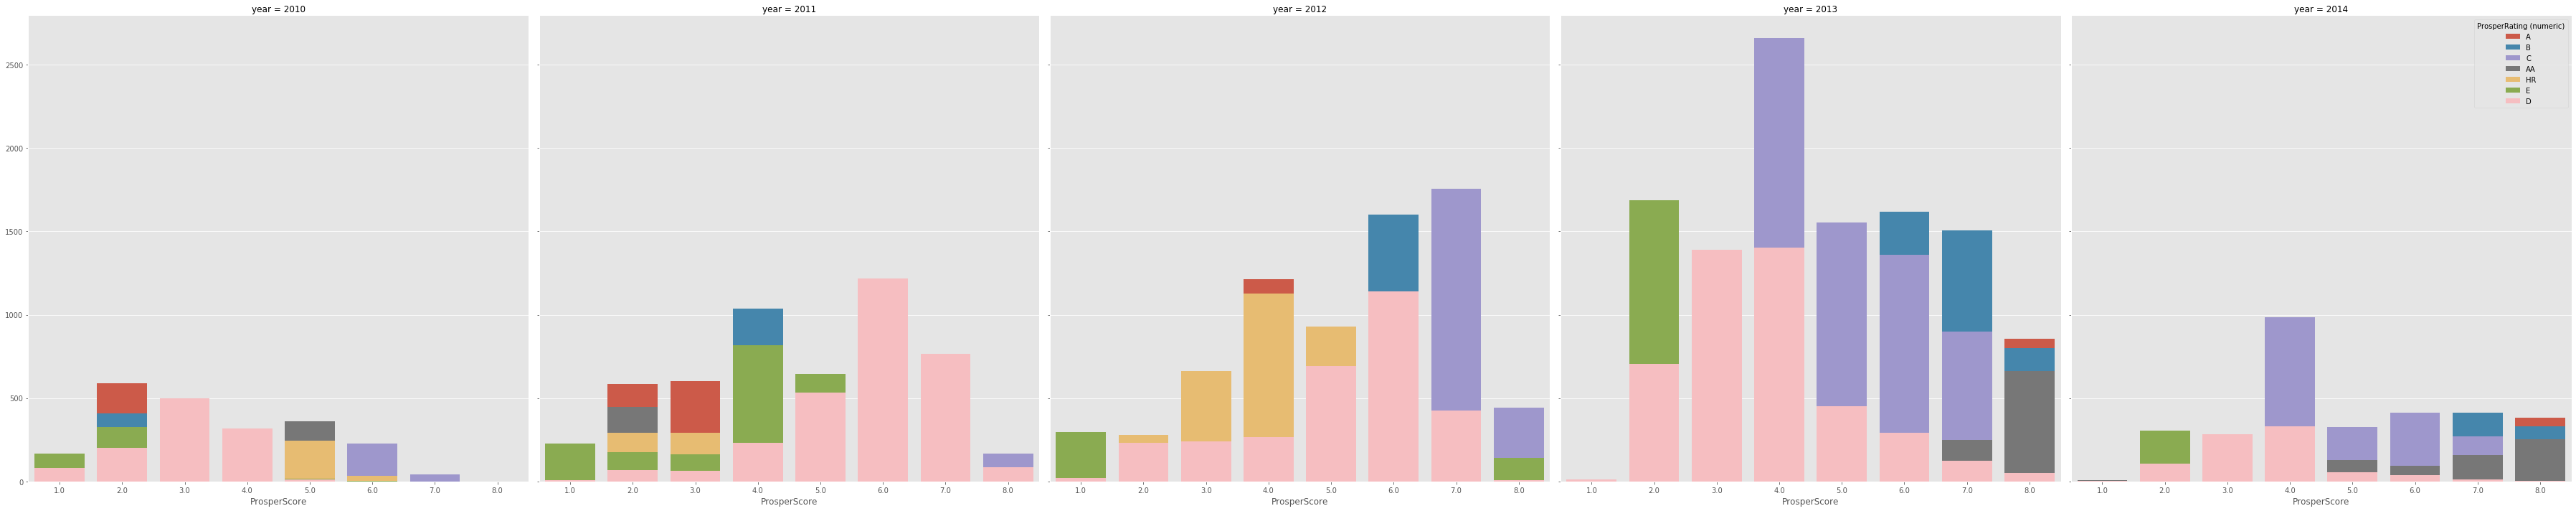

In [28]:

g = sns.FacetGrid(data = df_final, height = 10, col = 'year', col_wrap = 5, hue = 'ProsperRating (numeric)')
g.map(sns.countplot, "ProsperScore")
leg = plt.legend(loc = 'upper right', title = 'ProsperRating (numeric)')
plt.show()

Looking at the passing of the years, it is observed that in the more recent years the prosper rating and score relationship is stronger, and with more consistency, since the higher the rank, the higher the score.

In [29]:
sns.relplot(x="LenderYield",height = 20, y="EstimatedReturn", hue="ProsperRating (numeric)", 
             kind="scatter", data=df_final);

This last graph is another example of how the higher the prosper rating, the lower the loss and the credit payment.

### Some conclusions

As we observe in the plots, the prosper rating and score are fundamental to deduce the increase or decrease of the other loan relationships that have to do with the borrower and estimates of return or loss, and even though the column of years is not decisive, it can be see with interest the behavior of the other variables.

## Limitations of  Project:

- There are few qualitative relationships, beyond the prosper rating, since there are still other similar columns that do not keep much correlation with the other variables.

- I think that the information provided about the loans is not very enriching, and I tried to understand a little from the outside but I do not know if it captures well the possible concerns to be raised.

- Too many variables, I took the ones that I saw that had a better relationship between them, but maybe someone more expert in loans could make a more successful decision.

## References

- https://seaborn.pydata.org/generated/seaborn.lmplot.html
- https://www.kaggle.com/residentmario/multivariate-plotting
- https://stackoverflow.com/questions/23238041/move-and-resize-legends-box-in-matplotlib
- https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8